In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.float_format", "{:,.0f}".format)
pd.set_option('display.max_columns', None)

In [2]:
customers_ = pd.read_pickle("../customer_segmenation_prepation.pkl")
print(customers_.shape)
customers_.head(20)

(400000, 23)


,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,93,4,371,Mid-High,1,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,Card
1,50105,Megan,Hunter,megan.hunter@outlook.com,Female,India,False,53,3,158,Mid-Low,2,2024-11-19 21:50:30,Canceled,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25,paypal
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card
3,80695,Robert,MenDez,robert.mendez@gmail.com,Male,UK,False,46,2,92,Mid-Low,4,2023-11-29 21:25:01,Delivered,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21,Card
4,66044,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,UAE,True,55,6,328,Mid-High,5,2023-05-01 21:14:23,Delivered,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48,Card
5,15065,Reem,Chen,reem.chen@outlook.com,Female,UAE,False,318,3,953,High,6,2023-10-12 12:39:48,Canceled,6,15065,2023-10-14 14:39:48,AED,google_pay,Failed,68,68,google_pay
6,35823,Russell,Gomez,russell.gomez@hotmail.com,Male,UAE,False,68,1,68,Low,7,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,Card
7,12913,Olivia,Hernandez,olivia.hernandez@yahoo.com,Female,UK,False,182,3,547,High,8,2021-12-21 05:17:27,Canceled,8,12913,2021-12-23 14:17:27,GBP,credit_card,Failed,83,83,Card
8,28514,Olivia,Rogers,olivia.rogers@hotmail.com,Female,UK,False,143,2,286,Mid-High,9,2022-07-29 05:11:02,Delivered,9,28514,2022-07-31 01:11:02,GBP,credit_card,Paid,245,245,Card
9,79463,Amanda,Morgan,amanda.morgan@gmail.com,Female,UAE,False,243,2,485,High,10,2025-03-09 10:19:51,Delivered,10,79463,2025-03-10 14:19:51,AED,apple_pay,Paid,243,243,apple_pay


In [3]:
customers = customers_[~customers_['status_x'].isin(['Fully Returned' , 'Canceled'])]
print(customers.shape)


(320002, 23)


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [5]:
df = customers.copy()
features = df[['AOV', 'freq', 'CLV']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.64763686 0.3324735 ]


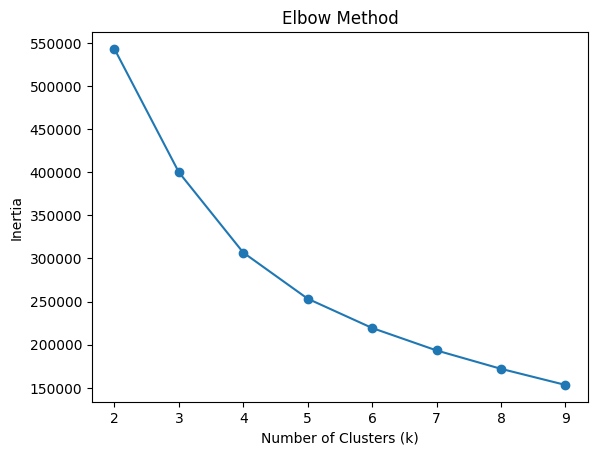

In [7]:
# --- 5. Elbow & Silhouette لتحديد أفضل k ---
inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    # silhouette.append(silhouette_score(X_pca, kmeans.labels_))

# Elbow
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [8]:
# --- 6. بناء الموديل بالـ k المختارة (مثلاً 4) ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(X_pca)

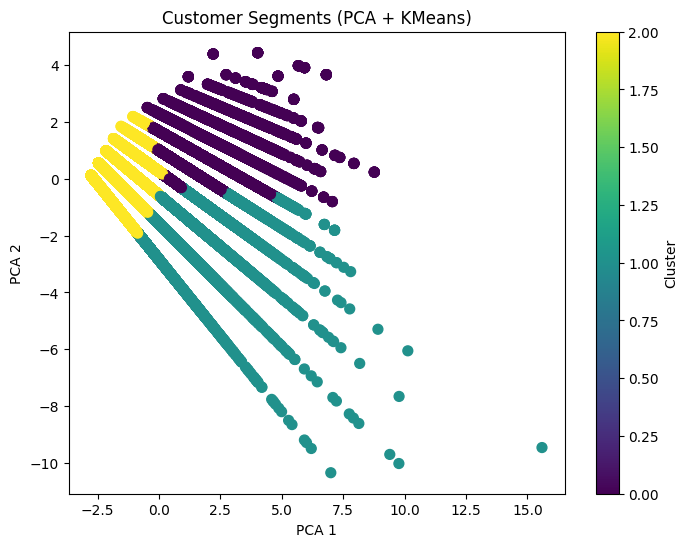

         AOV  freq  CLV
segment                
0        120     6  659
1        211     3  606
2         78     3  219


In [9]:
# --- 7. Visualization ---
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['segment'], cmap='viridis', s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments (PCA + KMeans)")
plt.colorbar(label="Cluster")
plt.show()

# --- 8. تحليل كل Segment ---
print(df.groupby('segment')[['AOV','freq','CLV']].mean())

In [10]:
# # 1. Recency (أيام من آخر طلب)
# max_date = df['order_date'].max()
# recency_df = df.groupby('customer_id')['order_date'].max().reset_index()
# recency_df['Recency'] = (max_date - recency_df['order_date']).dt.days
# recency_df.drop(columns=['order_date'], inplace=True)

# # 2. Frequency (عدد الطلبات)
# freq_df = df.groupby('customer_id')['order_id'].nunique().reset_index(name='Frequency')

# # 3. Monetary (إجمالي الإنفاق)
# monetary_df = df.groupby('customer_id')['bill_total'].sum().reset_index(name='Monetary')

# # 4. AOV (متوسط قيمة الطلب)
# aov_df = df.groupby('customer_id')['bill_total'].mean().reset_index(name='AOV')

# # 5. Return Rate (Cancelled / إجمالي الطلبات)
# returns_df = df.groupby('customer_id').agg(
#     total_orders=('order_id', 'count'),
#     cancelled_orders=('status_x', lambda x: (x == 'Canceled').sum())
# ).reset_index()
# returns_df['ReturnRate'] = returns_df['cancelled_orders'] / returns_df['total_orders']
# returns_df.drop(columns=['total_orders','cancelled_orders'], inplace=True)

# # 6. Preferred Payment Method
# payment_df = df.groupby(['customer_id','method_grouped']).size().reset_index(name='count')
# payment_df = payment_df.loc[payment_df.groupby('customer_id')['count'].idxmax()]
# payment_df = payment_df[['customer_id','method_grouped']].rename(columns={'method_grouped':'PreferredPayment'})

# # 7. Order Status Ratio (Delivered ÷ Canceled)
# status_df = df.groupby(['customer_id','status_x']).size().unstack(fill_value=0).reset_index()
# status_df['OrderStatusRatio'] = status_df.get('Delivered',0) / (status_df.get('Canceled',0) + 1)

# # --- دمج كل الـ features ---
# features = recency_df \
#     .merge(freq_df, on='customer_id', how='left') \
#     .merge(monetary_df, on='customer_id', how='left') \
#     .merge(aov_df, on='customer_id', how='left') \
#     .merge(returns_df, on='customer_id', how='left') \
#     .merge(payment_df, on='customer_id', how='left') \
#     .merge(status_df[['customer_id','OrderStatusRatio']], on='customer_id', how='left')

# # --- إضافة الديموجرافيك (مباشر من الجدول) ---
# demographics = df[['customer_id','gender','country','is_loyal']].drop_duplicates()
# final_df = features.merge(demographics, on='customer_id', how='left')

# print(final_df.head())

(Problem Definition) 

نبدأ بالـ Classification (توقع العميل Loyal / Not Loyal).

In [11]:
customers_.head(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,93,4,371,Mid-High,1,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,Card
1,50105,Megan,Hunter,megan.hunter@outlook.com,Female,India,False,53,3,158,Mid-Low,2,2024-11-19 21:50:30,Canceled,2,50105,2024-11-20 19:50:30,INR,paypal,Failed,25,25,paypal
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card
3,80695,Robert,MenDez,robert.mendez@gmail.com,Male,UK,False,46,2,92,Mid-Low,4,2023-11-29 21:25:01,Delivered,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21,Card
4,66044,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,UAE,True,55,6,328,Mid-High,5,2023-05-01 21:14:23,Delivered,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48,Card


In [12]:
customers['bill_total_cleaned'] = abs(customers['bill_total'])

C:\Users\omary\AppData\Local\Temp\ipykernel_22144\2930240040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['bill_total_cleaned'] = abs(customers['bill_total'])


In [13]:
customers.head(10)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped,bill_total_cleaned
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,93,4,371,Mid-High,1,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,Card,110
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card,88
3,80695,Robert,MenDez,robert.mendez@gmail.com,Male,UK,False,46,2,92,Mid-Low,4,2023-11-29 21:25:01,Delivered,4,80695,2023-12-01 02:25:01,GBP,credit_card,Paid,21,21,Card,21
4,66044,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,UAE,True,55,6,328,Mid-High,5,2023-05-01 21:14:23,Delivered,5,66044,2023-05-03 13:14:23,AED,credit_card,Paid,48,48,Card,48
6,35823,Russell,Gomez,russell.gomez@hotmail.com,Male,UAE,False,68,1,68,Low,7,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,Card,68
8,28514,Olivia,Rogers,olivia.rogers@hotmail.com,Female,UK,False,143,2,286,Mid-High,9,2022-07-29 05:11:02,Delivered,9,28514,2022-07-31 01:11:02,GBP,credit_card,Paid,245,245,Card,245
9,79463,Amanda,Morgan,amanda.morgan@gmail.com,Female,UAE,False,243,2,485,High,10,2025-03-09 10:19:51,Delivered,10,79463,2025-03-10 14:19:51,AED,apple_pay,Paid,243,243,apple_pay,243
10,91989,DanIelLe,Thompson,danielle.thompson@gmail.com,Female,KSA,False,45,3,135,Mid-Low,11,2024-03-17 08:01:27,Shipped,11,91989,2024-03-18 17:01:27,SAR,google_pay,Paid,45,45,google_pay,45
11,47075,Jack,Salem,jack.salem@hotmail.com,Male,UK,True,37,5,186,Mid-Low,12,2023-06-22 04:25:00,Placed,12,47075,2023-06-24 19:25:00,GBP,apple_pay,Pending,0,0,apple_pay,0
12,36931,Catherine,Ward,catherine.ward@outlook.com,Female,India,False,207,2,415,Mid-High,13,2022-06-22 01:41:58,Shipped,13,36931,2022-06-22 16:41:58,INR,paypal,Paid,215,215,paypal,215


In [14]:
customers[customers['customer_id'] == 1]

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped,bill_total_cleaned
288418,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,288419,2022-08-09 12:25:23,Placed,288419,1,2022-08-11 16:25:23,USD,paypal,Pending,147,147,paypal,147
397903,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,397904,2023-09-22 13:56:52,Shipped,397904,1,2023-09-24 09:56:52,USD,debit_card,Paid,35,35,Card,35


In [15]:
# we will nned additional info like preffered payment method and also return rate on order_items 

# let's calc the Recency Frequency Monetary (CLV) 


# clac RFM 

snapshot = max(customers_['order_date'])
customers['order_date'] = pd.to_datetime(customers['order_date'])
recency_df = customers.groupby('customer_id')['order_date'].max().reset_index()
ferq_df = customers.groupby('customer_id')["order_id"].nunique().reset_index(name='Frequency')
monetary_df = customers.groupby('customer_id')['bill_total_cleaned'].sum().reset_index(name='Monetary')

C:\Users\omary\AppData\Local\Temp\ipykernel_22144\2451927928.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['order_date'] = pd.to_datetime(customers['order_date'])


In [16]:
c = pd.read_pickle("../customers.pkl")

In [17]:
c.shape[0]

150000

In [18]:
c.duplicated().sum()

0

In [19]:
c_merged = customers_[["customer_id" ,"is_loyal" ,	"AOV"	,"freq",	"CLV",	"segments"]].copy()
print(c_merged.shape[0])
print(c_merged.duplicated().sum())
c_merged.drop_duplicates(inplace=True)

400000
260629


In [20]:
c_merged.shape

(139371, 6)

In [21]:
c.isna().sum()

customer_id    0
first_name     0
last_name      0
email          0
gender         0
country        0
dtype: int64

In [22]:
c_merged['customer_id'].duplicated().sum()

0

In [23]:
c = c.merge(c_merged , on='customer_id' , how='right')

In [24]:
c.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,93,4,371,Mid-High
1,50105,Megan,Hunter,megan.hunter@outlook.com,Female,India,False,53,3,158,Mid-Low
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High
3,80695,Robert,MenDez,robert.mendez@gmail.com,Male,United Kingdom,False,46,2,92,Mid-Low
4,66044,Paul,MitCheLl,paul.mitchell@hotmail.com,Male,United Arab Emirates,True,55,6,328,Mid-High


In [25]:
monetary_df.shape

(132053, 2)

In [26]:
# let's now merge them with rfm 
# recency_df = customers.groupby('customer_id')['order_date'].max().reset_index()
# ferq_df = customers.groupby('customer_id')["order_id"].nunique().reset_index(name='Frequency')
# monetary_df = customers.groupby('customer_id')['bill_total_cleaned'].sum().reset_index(name='Monetary')


c = c.merge(recency_df , on='customer_id' , how='right')
c = c.merge(ferq_df , on='customer_id' , how='right')
c = c.merge(monetary_df , on='customer_id' , how='right')



In [27]:
c.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69


In [28]:
# c = c.rename(columns={"order_date": "Recency"})
c['Recency'] =  (snapshot - c['order_date']).dt.days
c.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7,806
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325,128
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69,237


In [29]:
c

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7,806
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325,128
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132048,149994,Lina,Mostafa,lina.mostafa@gmail.com,Female,United Arab Emirates,False,10,1,10,Low,2023-11-17 00:06:02,1,10,683
132049,149996,Cameron,Mason,cameron.mason@gmail.com,Male,Germany,True,76,5,380,Mid-High,2024-12-21 09:45:52,3,228,283
132050,149998,Heather,Taha,heather.taha@outlook.com,Female,United Arab Emirates,False,48,2,95,Mid-Low,2024-01-17 15:58:43,2,95,621
132051,149999,Patricia,Naser,patricia.naser@gmail.com,Female,Saudi Arabia,True,129,4,516,High,2025-05-01 12:39:00,4,516,151


In [30]:
customers_[customers_['status_x'] == 'Fully Returned'].head(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped
27,49121,Ralph,Salem,ralph.salem@gmail.com,Male,Egypt,False,17,2,34,Low,28,2023-01-31 06:27:38,Fully Returned,28,49121,2023-01-31 08:27:38,EGP,debit_card,Fully Refunded,-218,218,Card
32,63990,Lily,Mcdonald,lily.mcdonald@hotmail.com,Female,Egypt,True,154,7,"1,076",High,33,2025-04-10 11:57:32,Fully Returned,33,63990,2025-04-16 04:57:32,EGP,card,Fully Refunded,-28,28,Card
34,59962,Hassan,Lopez,hassan.lopez@hotmail.com,Male,UK,True,218,7,"1,525",High,35,2024-11-01 09:45:15,Fully Returned,35,59962,2024-11-03 12:45:15,GBP,card,Fully Refunded,-95,95,Card
68,115047,LindA,MunOz,linda.munoz@hotmail.com,Female,USA,True,63,4,251,Mid-High,69,2025-02-04 06:42:13,Fully Returned,69,115047,2025-02-05 15:42:13,USD,debit_card,Fully Refunded,-62,62,Card
102,68748,Omar,Anderson,omar.anderson@gmail.com,Male,Egypt,False,83,4,332,Mid-High,103,2022-06-26 21:46:26,Fully Returned,103,68748,2022-06-28 16:46:26,EGP,debit_card,Fully Refunded,-43,43,Card


In [31]:
customers_returned_fully = customers_[customers_['status_x'] == "Fully Returned"]
customers_returned_fully.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped
27,49121,Ralph,Salem,ralph.salem@gmail.com,Male,Egypt,False,17,2,34,Low,28,2023-01-31 06:27:38,Fully Returned,28,49121,2023-01-31 08:27:38,EGP,debit_card,Fully Refunded,-218,218,Card
32,63990,Lily,Mcdonald,lily.mcdonald@hotmail.com,Female,Egypt,True,154,7,"1,076",High,33,2025-04-10 11:57:32,Fully Returned,33,63990,2025-04-16 04:57:32,EGP,card,Fully Refunded,-28,28,Card


In [32]:
Partially_Returned_df = customers[customers['status_x'] == 'Partially Returned'].copy()
Partially_Returned_df['partial_returned_amount'] = Partially_Returned_df['final_bill'] - Partially_Returned_df['bill_total_cleaned']
Partially_Returned_df.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped,bill_total_cleaned,partial_returned_amount
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card,88,60
6,35823,Russell,Gomez,russell.gomez@hotmail.com,Male,UAE,False,68,1,68,Low,7,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,Card,68,180
16,147272,MadIsoN,Rogers,madison.rogers@yahoo.com,Female,UAE,True,41,3,122,Mid-Low,17,2024-06-10 01:07:06,Partially Returned,17,147272,2024-06-11 19:07:06,AED,card,Partially Refunded,96,249,Card,96,152
17,104898,Isaac,Edwards,isaac.edwards@outlook.com,Male,India,True,95,5,475,High,18,2022-04-27 16:56:22,Partially Returned,18,104898,2021-04-28 20:56:22,INR,google_pay,Partially Refunded,50,77,google_pay,50,27
24,39665,Pamela,Wagner,pamela.wagner@yahoo.com,Female,Egypt,False,45,5,227,Mid-Low,25,2023-04-21 10:01:14,Partially Returned,25,39665,2023-04-22 06:01:14,EGP,debit_card,Partially Refunded,69,223,Card,69,154


In [33]:
Partially_Returned_df['partial_returned_rate_within_order'] = Partially_Returned_df['partial_returned_amount'] / Partially_Returned_df['final_bill'] *100
# Partially_Returned_df['Partially_Returned_rate'] =  Partially_Returned_df["total_partial_returned"] / Partially_Returned_df["total_spent"]
Partially_Returned_df.head()



,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped,bill_total_cleaned,partial_returned_amount,partial_returned_rate_within_order
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card,88,60,41
6,35823,Russell,Gomez,russell.gomez@hotmail.com,Male,UAE,False,68,1,68,Low,7,2024-02-05 08:22:03,Partially Returned,7,35823,2024-02-05 21:22:03,AED,card,Partially Refunded,-68,248,Card,68,180,73
16,147272,MadIsoN,Rogers,madison.rogers@yahoo.com,Female,UAE,True,41,3,122,Mid-Low,17,2024-06-10 01:07:06,Partially Returned,17,147272,2024-06-11 19:07:06,AED,card,Partially Refunded,96,249,Card,96,152,61
17,104898,Isaac,Edwards,isaac.edwards@outlook.com,Male,India,True,95,5,475,High,18,2022-04-27 16:56:22,Partially Returned,18,104898,2021-04-28 20:56:22,INR,google_pay,Partially Refunded,50,77,google_pay,50,27,35
24,39665,Pamela,Wagner,pamela.wagner@yahoo.com,Female,Egypt,False,45,5,227,Mid-Low,25,2023-04-21 10:01:14,Partially Returned,25,39665,2023-04-22 06:01:14,EGP,debit_card,Partially Refunded,69,223,Card,69,154,69


In [34]:
Partially_Returned_df_rate = Partially_Returned_df.groupby('customer_id')['partial_returned_rate_within_order'].sum().reset_index(name='avg_partial_return')
Partially_Returned_df_rate

,customer_id,avg_partial_return
0,4,95
1,6,46
2,9,89
3,11,10
4,15,98
...,...,...
41999,149979,36
42000,149981,53
42001,149983,44
42002,149988,111


In [35]:
c

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7,806
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325,128
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132048,149994,Lina,Mostafa,lina.mostafa@gmail.com,Female,United Arab Emirates,False,10,1,10,Low,2023-11-17 00:06:02,1,10,683
132049,149996,Cameron,Mason,cameron.mason@gmail.com,Male,Germany,True,76,5,380,Mid-High,2024-12-21 09:45:52,3,228,283
132050,149998,Heather,Taha,heather.taha@outlook.com,Female,United Arab Emirates,False,48,2,95,Mid-Low,2024-01-17 15:58:43,2,95,621
132051,149999,Patricia,Naser,patricia.naser@gmail.com,Female,Saudi Arabia,True,129,4,516,High,2025-05-01 12:39:00,4,516,151


In [36]:
customers_returned_fully.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped
27,49121,Ralph,Salem,ralph.salem@gmail.com,Male,Egypt,False,17,2,34,Low,28,2023-01-31 06:27:38,Fully Returned,28,49121,2023-01-31 08:27:38,EGP,debit_card,Fully Refunded,-218,218,Card
32,63990,Lily,Mcdonald,lily.mcdonald@hotmail.com,Female,Egypt,True,154,7,"1,076",High,33,2025-04-10 11:57:32,Fully Returned,33,63990,2025-04-16 04:57:32,EGP,card,Fully Refunded,-28,28,Card


In [37]:
returned_rate = customers_returned_fully.groupby('customer_id')['final_bill'].sum().reset_index(name='returned_values')
returned_rate

,customer_id,returned_values
0,39,59
1,65,90
2,90,25
3,130,19
4,139,0
...,...,...
8156,149921,16
8157,149928,74
8158,149935,191
8159,149952,43


In [38]:
c = c.merge(returned_rate , on='customer_id' , how='left')

In [39]:
customers__ = customers_[~customers_['status_x'].isin(['Canceled'])]
total_spend_with_cancelled_returned = customers__.groupby('customer_id')['final_bill'].sum().reset_index(name='total_spent')

In [40]:
total_spend_with_cancelled_returned.head()

,customer_id,total_spent
0,1,182
1,2,403
2,4,139
3,5,325
4,6,101


In [41]:
c[c['customer_id'] == 1]

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,returned_values
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738,NaN


In [42]:
c.tail(50)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,returned_values
132003,149947,Juan,Flores,juan.flores@outlook.com,Male,USA,True,96,3,289,Mid-High,2025-07-09 15:35:21,3,289,82,NaN
132004,149948,Austin,Gonzales,austin.gonzales@gmail.com,Male,Saudi Arabia,False,110,2,220,Mid-Low,2025-08-07 20:40:22,2,220,53,NaN
132005,149949,HenrY,Alexander,henry.alexander@yahoo.com,Male,Germany,False,0,1,0,Low,2025-03-20 18:22:17,1,0,193,NaN
132006,149950,Mason,Baker,mason.baker@gmail.com,Male,Germany,False,50,2,99,Mid-Low,2023-12-12 18:30:39,2,99,657,NaN
132007,149951,Jacqueline,ReyNolDs,jacqueline.reynolds@yahoo.com,Female,Egypt,False,117,2,234,Mid-Low,2025-01-20 20:31:51,2,234,252,NaN
132008,149952,Gregory,Long,gregory.long@gmail.com,Male,France,False,21,3,64,Low,2023-08-20 07:50:10,2,43,772,43
132009,149953,Hana,Cruz,hana.cruz@outlook.com,Female,Germany,False,146,1,146,Mid-Low,2022-10-29 03:08:22,1,146,1067,NaN
132010,149954,Howard,HarRis,howard.harris@outlook.com,Male,Saudi Arabia,False,199,2,397,Mid-High,2023-03-20 22:51:36,1,199,924,NaN
132011,149955,Martha,Parker,martha.parker@outlook.com,Female,Germany,True,119,5,597,High,2024-11-01 08:30:12,4,477,333,NaN
132012,149956,Abigail,James,abigail.james@yahoo.com,Female,India,False,113,1,113,Mid-Low,2022-08-20 19:35:42,1,113,1136,NaN


In [43]:
c = c.merge(total_spend_with_cancelled_returned , on='customer_id' , how='left')
c['returned_values'] = c['returned_values'].fillna(0)
c['return_rate'] = c['returned_values'] / c['total_spent']

In [44]:
c['return_rate'] =  c['returned_values'] / c['total_spent'] * 100
c.tail(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,returned_values,total_spent,return_rate
132048,149994,Lina,Mostafa,lina.mostafa@gmail.com,Female,United Arab Emirates,False,10,1,10,Low,2023-11-17 00:06:02,1,10,683,0,10,0
132049,149996,Cameron,Mason,cameron.mason@gmail.com,Male,Germany,True,76,5,380,Mid-High,2024-12-21 09:45:52,3,228,283,0,228,0
132050,149998,Heather,Taha,heather.taha@outlook.com,Female,United Arab Emirates,False,48,2,95,Mid-Low,2024-01-17 15:58:43,2,95,621,0,95,0
132051,149999,Patricia,Naser,patricia.naser@gmail.com,Female,Saudi Arabia,True,129,4,516,High,2025-05-01 12:39:00,4,516,151,0,516,0
132052,150000,Sharon,Cruz,sharon.cruz@outlook.com,Female,India,True,80,3,241,Mid-High,2024-01-11 05:13:39,3,241,628,0,241,0


In [45]:
c = c.drop(columns={'returned_values'})

In [46]:
c.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,total_spent,return_rate
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738,182,0
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398,403,0


In [47]:
c = c.merge(Partially_Returned_df_rate , on='customer_id' , how='left')
c['avg_partial_return'] = c['avg_partial_return'].fillna(0)



In [48]:
c['partial_return_rate'] = c['avg_partial_return'] / c['total_spent'] * 100
c.head(5)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,total_spent,return_rate,avg_partial_return,partial_return_rate
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738,182,0,0,0
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398,403,0,0,0
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7,806,139,0,95,68
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325,128,325,0,0,0
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69,237,101,0,46,45


In [49]:
c = c.drop(columns={'avg_partial_return' , 'total_spent'})

In [50]:
c.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,return_rate,partial_return_rate
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738,0,0
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398,0,0


In [51]:
# احسب عدد الطلبات حسب status_x لكل عميل
order_status_counts = (
    customers_.groupby(["customer_id", "status_x"])
    .size()
    .reset_index(name="count")
)

# اجمالي الطلبات لكل عميل
total_orders = (
    customers_.groupby("customer_id")
    .size()
    .reset_index(name="total_orders")
)

# دمج
order_status_ratio = order_status_counts.merge(total_orders, on="customer_id")
order_status_ratio["status_ratio"] = (
    order_status_ratio["count"] / order_status_ratio["total_orders"] * 100
)

# Pivot علشان نخلي كل status في عمود منفصل
order_status_ratio_pivot = order_status_ratio.pivot(
    index="customer_id", columns="status_x", values="status_ratio"
).fillna(0).reset_index()

order_status_ratio_pivot.head(10)


status_x,customer_id,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped
0,1,33,0,0,0,33,33
1,2,0,33,0,0,67,0
2,4,0,0,0,100,0,0
3,5,0,50,0,0,50,0
4,6,0,50,0,50,0,0
5,7,0,100,0,0,0,0
6,8,0,100,0,0,0,0
7,9,0,0,0,100,0,0
8,10,0,50,0,0,50,0
9,11,0,50,0,50,0,0


In [52]:
c = c.merge(order_status_ratio_pivot , on='customer_id' , how='left')
c.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738,0,0,33,0,0,0,33,33
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398,0,0,0,33,0,0,67,0
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7,806,0,68,0,0,0,100,0,0
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325,128,0,0,0,50,0,0,50,0
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69,237,0,45,0,50,0,50,0,0


In [53]:
customers.head(2)

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_id,order_date,status_x,payment_id,customer_id_original,paid_at,currency_original,method,status_y,bill_total,final_bill,method_grouped,bill_total_cleaned
0,51069,Lina,JoneS,lina.jones@gmail.com,Female,Egypt,True,93,4,371,Mid-High,1,2022-04-02 04:41:12,Delivered,1,51069,2022-04-04 21:41:12,EGP,debit_card,Paid,110,110,Card,110
2,68331,WaltEr,Reyes,walter.reyes@gmail.com,Male,Egypt,True,146,4,583,High,3,2025-05-05 03:51:50,Partially Returned,3,68331,2025-05-07 00:51:50,EGP,credit_card,Partially Refunded,88,148,Card,88


In [54]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. نعمل جدول تقاطعي (contingency table)
contingency = pd.crosstab(customers['method'], customers['is_loyal'])

print("📊 Contingency Table:")
print(contingency)

# 2. اختبار Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency)

print("\n🔍 Chi-Square Test Result:")
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# 3. القرار
alpha = 0.05
if p < alpha:
    print("\n✅ يوجد ارتباط معنوي بين طريقة الدفع والولاء (significant).")
else:
    print("\n❌ لا يوجد ارتباط معنوي قوي بين طريقة الدفع والولاء.")


📊 Contingency Table:
is_loyal     False  True 
method                   
apple_pay    17298  28646
card         33708  57907
credit_card  16832  28500
debit_card   16929  28880
google_pay   16693  28894
paypal       16909  28806

🔍 Chi-Square Test Result:
Chi2 Statistic: 13.230739983119884
Degrees of Freedom: 5
P-value: 0.021309813614449804

✅ يوجد ارتباط معنوي بين طريقة الدفع والولاء (significant).


In [55]:
import numpy as np

n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))
print("Cramer's V:", cramers_v)


Cramer's V: 0.006430070297903003


In [56]:
# طريقة الدفع مش فارق جوهري في تحديد إذا العميل loyal أو مش loyal

In [57]:
c.head()

,customer_id,first_name,last_name,email,gender,country,is_loyal,AOV,freq,CLV,segments,order_date,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped
0,1,Gavin,Hamza,gavin.hamza@outlook.com,Male,USA,False,91,3,273,Mid-High,2023-09-22 13:56:52,2,182,738,0,0,33,0,0,0,33,33
1,2,Jack,Salem,jackdotsalem@yahoodotcom,Male,France,True,134,3,403,Mid-High,2024-08-28 08:38:35,3,403,398,0,0,0,33,0,0,67,0
2,4,Austin,Reynolds,austin.reynolds@yahoo.com,Male,USA,False,7,1,7,Low,2023-07-16 16:45:09,1,7,806,0,68,0,0,0,100,0,0
3,5,Steven,ParKer,steven.parker@gmail.com,Male,Saudi Arabia,True,81,4,325,Mid-High,2025-05-25 10:12:38,4,325,128,0,0,0,50,0,0,50,0
4,6,Kathryn,Edwards,kathryn.edwards@outlook.com,Female,Saudi Arabia,False,34,2,69,Low,2025-02-04 11:16:32,2,69,237,0,45,0,50,0,50,0,0


Let's Start Modeling

In [58]:
# Some preprocessing
c_df = c.drop(columns={	"customer_id",	"first_name",	"last_name" ,	"email" , 	"segments"	,"order_date" ,"freq"}).copy()
c_df['is_loyal'] = c_df['is_loyal'].replace({True: 1, False: 0})
c_df.head()

C:\Users\omary\AppData\Local\Temp\ipykernel_22144\1647674685.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c_df['is_loyal'] = c_df['is_loyal'].replace({True: 1, False: 0})


,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0


In [59]:
c_df.isna().sum()

gender                   0
country                  0
is_loyal                 0
AOV                      0
CLV                      0
Frequency                0
Monetary                 0
Recency                  0
return_rate            466
partial_return_rate    466
Canceled                 0
Delivered                0
Fully Returned           0
Partially Returned       0
Placed                   0
Shipped                  0
dtype: int64

In [60]:
c_df['return_rate'] =c_df['return_rate'].fillna(0)
c_df['partial_return_rate'] =c_df['partial_return_rate'].fillna(0)

In [61]:
c_df.isna().sum()

gender                 0
country                0
is_loyal               0
AOV                    0
CLV                    0
Frequency              0
Monetary               0
Recency                0
return_rate            0
partial_return_rate    0
Canceled               0
Delivered              0
Fully Returned         0
Partially Returned     0
Placed                 0
Shipped                0
dtype: int64

In [62]:
c_df.shape[0]

132053

In [63]:
c_df.columns

Index(['gender', 'country', 'is_loyal', 'AOV', 'CLV', 'Frequency', 'Monetary',
       'Recency', 'return_rate', 'partial_return_rate', 'Canceled',
       'Delivered', 'Fully Returned', 'Partially Returned', 'Placed',
       'Shipped'],
      dtype='object')

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
# let's do 
x = c_df.drop("is_loyal" , axis=1)
y = c_df['is_loyal']

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.80 , random_state=42)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [ 'AOV', 'CLV', 'Frequency', 'Monetary',
       'Recency', 'return_rate', 'partial_return_rate', 'Canceled',
       'Delivered', 'Fully Returned', 'Partially Returned', 'Placed',
       'Shipped']

categorical_features = ['gender','country']

# to prevent some nulls
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])



preprosser = ColumnTransformer(
    transformers=[
        ('nums', numeric_transformer, numeric_features),
        ('cats', categorical_transformer, categorical_features)
    ]
)


In [67]:

# --------------------------
# 1. Logistic Regression
# --------------------------
log_reg = Pipeline(steps=[('preprocessor', preprosser),
                         ('classifier', LogisticRegression(max_iter=1000))])

log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)

print("📌 Logistic Regression Report")
print(classification_report(y_test, y_pred_log))


📌 Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15615
           1       1.00      1.00      1.00     10796

    accuracy                           1.00     26411
   macro avg       1.00      1.00      1.00     26411
weighted avg       1.00      1.00      1.00     26411



In [68]:
rf = Pipeline(steps=[('preprocessor', preprosser),
                    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))])

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("📌 Random Forest Report")
print(classification_report(y_test, y_pred_rf))

📌 Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15615
           1       1.00      1.00      1.00     10796

    accuracy                           1.00     26411
   macro avg       1.00      1.00      1.00     26411
weighted avg       1.00      1.00      1.00     26411



In [69]:
print(set(x_train.columns).intersection(['is_loyal']))


set()


In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [71]:
from sklearn.model_selection import cross_validate

scores = cross_validate(log_reg, x, y, cv=5, scoring='accuracy' ,return_train_score=True)
print("Cross-validation scores:", scores)


Cross-validation scores: {'fit_time': array([0.49959135, 0.52457809, 0.52029324, 0.42679834, 0.52825403]), 'score_time': array([0.06832457, 0.02696967, 0.03903842, 0.03879213, 0.03816819]), 'test_score': array([1., 1., 1., 1., 1.]), 'train_score': array([1., 1., 1., 1., 1.])}


Correlation with target:
 is_loyal               1
Frequency              1
Monetary               1
CLV                    0
Delivered              0
Placed                 0
Shipped                0
Partially Returned     0
AOV                   -0
partial_return_rate   -0
Fully Returned        -0
return_rate           -0
Canceled              -0
Recency               -0
Name: is_loyal, dtype: float64


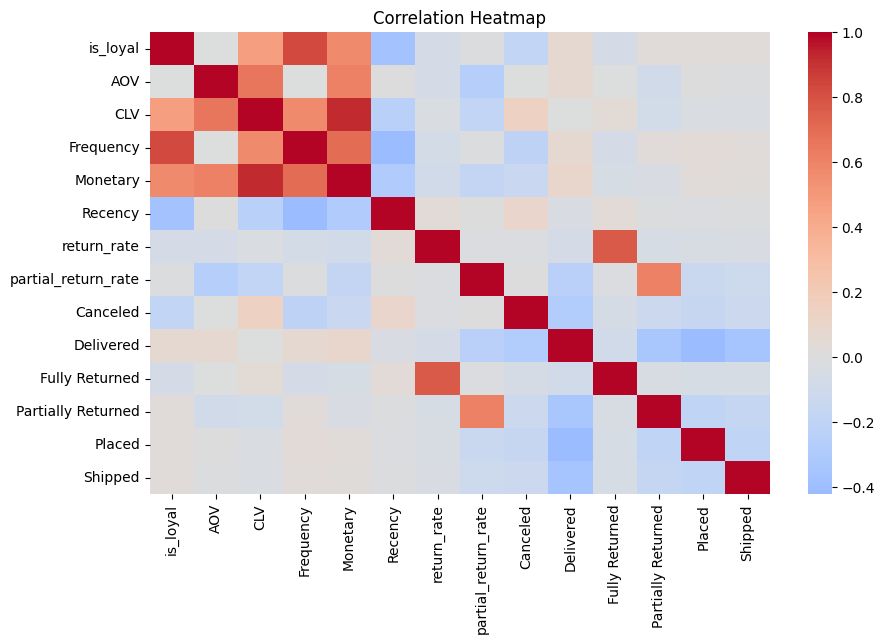

In [72]:
# فيه داتا ليكدج وده واضح لان اصلا اس لويال حسبينه من RFm

correlations = c_df.corr(numeric_only=True)['is_loyal'].sort_values(ascending=False)
print("Correlation with target:\n", correlations)

plt.figure(figsize=(10,6))
sns.heatmap(c_df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [73]:
c_df.columns

Index(['gender', 'country', 'is_loyal', 'AOV', 'CLV', 'Frequency', 'Monetary',
       'Recency', 'return_rate', 'partial_return_rate', 'Canceled',
       'Delivered', 'Fully Returned', 'Partially Returned', 'Placed',
       'Shipped'],
      dtype='object')

In [74]:
# Customer loyalty prediction should be based solely on behavioral, transactional, and demographic features that are observable prior to the loyalty outcome.
# يعني ما ادخلش في الفيةتشر اي اةتبوت لازم يكون انبوت يعني حاجه زي الديلفري المفروص انها ناتج عن التوصيل بنجاح 
# اما عن الكانسل والبيسد دا ناتج عن سلوك العميل فمش اوتبوت فاحنا ناخده معانا عادي 

# Great catch, Omar—and you're absolutely right to question that. Let's clarify the distinction between outputs and 
# predictive features, because this is where many models go wrong due to data leakage.

# 🔍 Are “Canceled” and “Placed” Outputs?
# Not quite. They’re behavioral features, not outcomes of the loyalty label. Here's the nuance:



# 🧠 Why They're Not “Outputs”
# An output in this context would be something that happens because of loyalty—like:
# - Being offered a discount for being loyal
# - Receiving priority shipping
# - Having a higher delivery success rate
# But Placed and Canceled are just raw behavioral data. They’re part of the customer’s transaction history, which you use to predict loyalty—not the result of loyalty.

# ✅ How to Use Them Safely
# To avoid misleading your model:
# - Use ratios like Canceled / Placed to normalize behavior
# - Avoid using features that occur after loyalty is assigned (e.g., “Delivered” or “Shipped”)


In [75]:
c_df

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132048,Female,United Arab Emirates,0,10,10,1,10,683,0,0,0,100,0,0,0,0
132049,Male,Germany,1,76,380,3,228,283,0,0,40,0,0,0,20,40
132050,Female,United Arab Emirates,0,48,95,2,95,621,0,0,0,50,0,0,50,0
132051,Female,Saudi Arabia,1,129,516,4,516,151,0,0,0,100,0,0,0,0


In [76]:
#  Monetary and Frequency are causing data lekage let's remove them     
x = c_df.drop(["is_loyal" ,'Frequency' ,'Monetary' ,'Shipped' ,'Fully Returned', 'Partially Returned' ,'Delivered'] , axis=1)
y = c_df['is_loyal']

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.80 , random_state=42)

numeric_features = ['AOV', 'CLV',
       'Recency',   
        'return_rate', 'partial_return_rate', 
       'Canceled','Placed',
       ]

categorical_features = ['gender','country']

# to prevent some nulls
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # تعويض القيم الناقصة بالـ median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # تعويض القيم الناقصة بأكثر فئة شيوعًا
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])



preprosser = ColumnTransformer(
    transformers=[
        ('nums', numeric_transformer, numeric_features),
        ('cats', categorical_transformer, categorical_features)
    ]
)

rf = Pipeline(steps=[('preprocessor', preprosser),
                    ('classifier', LogisticRegression())])

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("📌 LogisticRegression Report")
print(classification_report(y_test, y_pred_rf))


📌 LogisticRegression Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     15615
           1       0.94      0.95      0.94     10796

    accuracy                           0.95     26411
   macro avg       0.95      0.95      0.95     26411
weighted avg       0.95      0.95      0.95     26411



In [77]:
import pickle
with open('loyalCustmer_LogisticRegression.pkl' , 'wb') as file :
    pickle.dump(rf , file)

In [78]:
# ler's try creoos validation
cv = cross_validate(rf , x,y,cv=5 , scoring='accuracy' ,return_train_score=True)
cv

{'fit_time': array([0.4348526 , 0.43139243, 0.38724852, 0.37566972, 0.45640039]),
 'score_time': array([0.02917624, 0.03450656, 0.08024859, 0.03201938, 0.08602428]),
 'test_score': array([0.95740411, 0.95331491, 0.95838855, 0.9550549 , 0.95543355]),
 'train_score': array([0.95603075, 0.95652297, 0.95504629, 0.95606902, 0.95626781])}

In [79]:
models = {
    "LogisticRegression" : LogisticRegression(max_iter=1000 ,class_weight='balanced'),
    "KNN" : KNeighborsClassifier(n_neighbors=2  ),
    # "SVC" : SVC(kernel='linear', C=1 ,  gamma=0.1) ,
    "GaussianNB" : GaussianNB() ,
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100 , random_state=22 ,class_weight='balanced') ,
    "DecisionTreeClassifier" : DecisionTreeClassifier(random_state=42 , class_weight='balanced')
}

In [80]:
# let's try on all other models to find the best one

for name , model in models.items() :
    m = Pipeline(steps=[('preprocessor', preprosser),
                    ('classifier', model)])
    m.fit(x_train , y_train)
    y_pred = m.predict(x_test)
    print(f"📌 {name} Report")
    print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
    print(classification_report(y_test, y_pred))


📌 LogisticRegression Report
accuracy_score : 0.9517625231910947
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     15615
           1       0.92      0.97      0.94     10796

    accuracy                           0.95     26411
   macro avg       0.95      0.95      0.95     26411
weighted avg       0.95      0.95      0.95     26411

📌 KNN Report
accuracy_score : 0.9588429063647722
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15615
           1       0.98      0.92      0.95     10796

    accuracy                           0.96     26411
   macro avg       0.96      0.95      0.96     26411
weighted avg       0.96      0.96      0.96     26411

📌 GaussianNB Report
accuracy_score : 0.7248873575404188
              precision    recall  f1-score   support

           0       0.88      0.62      0.73     15615
           1       0.61      0.88      0.72     10796

    accuracy 

In [81]:
# We can Do More Feature Engineering Ideas
# boost predictive power with derived features


c_df['cancel_rate'] = c_df['Canceled'] / c_df['Placed'] * 100
c_df['avg_spend'] = c_df['Monetary'] / c_df['Frequency']
c_df['engagement_score'] = c_df['CLV'] + c_df['Frequency'] - c_df['return_rate']

In [82]:
c_df.head()

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped,cancel_rate,avg_spend,engagement_score
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33,100,91,275
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0,0,134,406
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0,NaN,7,8
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0,0,81,329
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0,NaN,34,71


In [83]:
c_df.replace([np.inf, -np.inf], np.nan, inplace=True) # some values conatins inf make it null then impute it with 0 
c_df.replace([np.inf, -np.inf], np.nan, inplace=True)

c_df['cancel_rate']  = c_df['cancel_rate'].fillna(0) 
c_df['avg_spend']  = c_df['cancel_rate'].fillna(0)
c_df['engagement_score']  = c_df['engagement_score'].fillna(0)

In [84]:
#  Monetary and Frequency are causing data lekage let's remove them     
x = c_df.drop(["is_loyal" ,'Frequency' ,'Monetary' ,'Shipped' ,'Fully Returned', 'Partially Returned' ,'Delivered'] , axis=1)
y = c_df['is_loyal']

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.80 , random_state=42)

numeric_features = ['AOV', 'CLV',
       'Recency',   
        'return_rate', 'partial_return_rate', 
       'Canceled','Placed', 'cancel_rate' , 'avg_spend' ,'engagement_score'
       ]

categorical_features = ['gender','country']

# to prevent some nulls
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # تعويض القيم الناقصة بالـ median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # تعويض القيم الناقصة بأكثر فئة شيوعًا
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])



preprosser = ColumnTransformer(
    transformers=[
        ('nums', numeric_transformer, numeric_features),
        ('cats', categorical_transformer, categorical_features)
    ]
)

rf = Pipeline(steps=[('preprocessor', preprosser),
                    ('classifier', LogisticRegression())])

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("📌 LogisticRegression Report")
print(classification_report(y_test, y_pred_rf))


📌 LogisticRegression Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     15615
           1       0.94      0.95      0.95     10796

    accuracy                           0.96     26411
   macro avg       0.95      0.96      0.95     26411
weighted avg       0.96      0.96      0.96     26411



In [85]:
with open('loyalCustmer_LogisticRegression1.pkl' , 'wb') as file :
    pickle.dump(rf , file)

هل العميل هيعمل return أو not return → ممكن نعتبرها Binary Classification لو عملنا Feature: ReturnRate > 0 → returner.

In [86]:
c_df

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped,cancel_rate,avg_spend,engagement_score
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33,100,100,275
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0,0,0,406
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0,0,0,8
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0,0,0,329
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0,0,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132048,Female,United Arab Emirates,0,10,10,1,10,683,0,0,0,100,0,0,0,0,0,0,11
132049,Male,Germany,1,76,380,3,228,283,0,0,40,0,0,0,20,40,200,200,383
132050,Female,United Arab Emirates,0,48,95,2,95,621,0,0,0,50,0,0,50,0,0,0,97
132051,Female,Saudi Arabia,1,129,516,4,516,151,0,0,0,100,0,0,0,0,0,0,520


In [87]:
def classify_return(row):
    if row["return_rate"] == 0 and row["partial_return_rate"] == 0:
        return 0  # No Return
    elif row["partial_return_rate"] > 0:
        return 1  # Partial Return
    elif row["return_rate"] > 0:
        return 2  # Full Return
    else:
        return 0  # fallback

c_df["return_class"] = c_df.apply(classify_return, axis=1)

c_df.head()

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped,cancel_rate,avg_spend,engagement_score,return_class
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33,100,100,275,0
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0,0,0,406,0
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0,0,0,8,1
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0,0,0,329,0
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0,0,0,71,1


In [88]:
# <!-- let's see if there a data lekage fisrt  -->
# من الواضح انها دلخ فيها البارشال ريترن والفول ريترن كامن 

correaction = c_df.corr(numeric_only=True)['return_class']
correaction

is_loyal               0
AOV                   -0
CLV                    0
Frequency              0
Monetary               0
Recency               -0
return_rate            0
partial_return_rate    0
Canceled              -0
Delivered             -0
Fully Returned         1
Partially Returned     1
Placed                -0
Shipped               -0
cancel_rate           -0
avg_spend             -0
engagement_score       0
return_class           1
Name: return_class, dtype: float64

<Axes: >

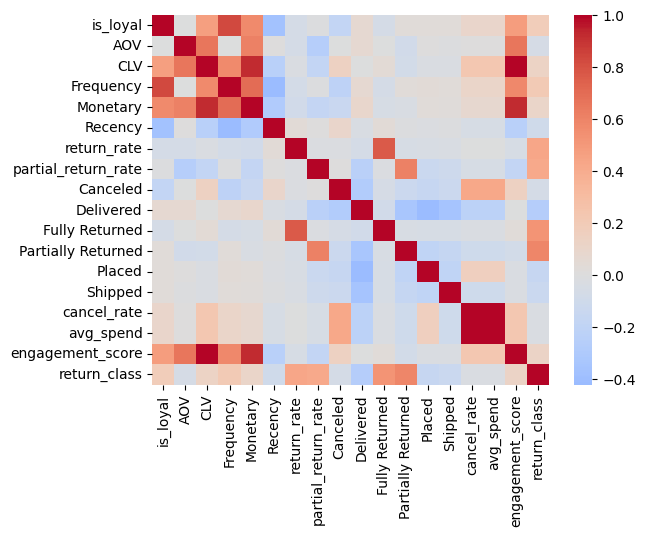

In [89]:
plt.Figure(figsize=(12,6))

sns.heatmap(c_df.corr(numeric_only=True) , annot=False , cmap="coolwarm", center=0)

In [90]:
c_df.columns

Index(['gender', 'country', 'is_loyal', 'AOV', 'CLV', 'Frequency', 'Monetary',
       'Recency', 'return_rate', 'partial_return_rate', 'Canceled',
       'Delivered', 'Fully Returned', 'Partially Returned', 'Placed',
       'Shipped', 'cancel_rate', 'avg_spend', 'engagement_score',
       'return_class'],
      dtype='object')

In [91]:
# let's drop 'Partially Returned' and Fully 

x = c_df.drop(['return_class','partial_return_rate' , 'return_rate' , "Partially Returned" , "Fully Returned" ,"Shipped" ]  , axis=1)
y = c_df['return_class']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=42)

# preprossong


numeric_features = [ 'is_loyal', 'AOV', 'CLV', 'Frequency', 'Monetary',
       'Recency', 'Canceled',
         'Placed','cancel_rate', 'avg_spend', 'engagement_score'
    ]

categorical_features = ['gender','country']

nums_transformation = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='median')) ,
    ('scaller' , StandardScaler()) ,
])

cats_transformation = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')) ,
    ('encoding' , OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer([
    ("num", nums_transformation, numeric_features),
    ("cat", cats_transformation, categorical_features)
])

model = Pipeline(steps=[
    ("preprocessor" , preprocessor) ,
    ("model" , LogisticRegression(max_iter=1000))
])

model.fit(x_train , y_train)

y_pred = model.predict(x_test)

print(f"confusion_matrix : {confusion_matrix(y_test , y_pred)}")



confusion_matrix : [[15763  1581    37]
 [ 5677  2293   140]
 [  171   199   550]]


In [92]:
print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
print(classification_report(y_test, y_pred))

accuracy_score : 0.7044791942751126
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     17381
           1       0.56      0.28      0.38      8110
           2       0.76      0.60      0.67       920

    accuracy                           0.70     26411
   macro avg       0.68      0.60      0.62     26411
weighted avg       0.68      0.70      0.67     26411



In [93]:
# 2       0.28      0.02      0.04       920 is because class implanced
c_df['return_class'].value_counts()

return_class
0    87015
1    40192
2     4846
Name: count, dtype: int64

Aftert Over Sampling

In [94]:
from imblearn.pipeline import Pipeline  # لازم من imblearn
from imblearn.over_sampling import SMOTE


# preprocessor معمول قبل كده
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    # ("smote", SMOTE(random_state=42)) , 
    ('classifier', LogisticRegression(max_iter=1000))

])

# 3️⃣ نطبق الـ pipeline
model.fit(x_train, y_train)

# 4️⃣ نعمل prediction
y_pred = model.predict(x_test)

print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
print(classification_report(y_test, y_pred))

accuracy_score : 0.7044791942751126
              precision    recall  f1-score   support

           0       0.73      0.91      0.81     17381
           1       0.56      0.28      0.38      8110
           2       0.76      0.60      0.67       920

    accuracy                           0.70     26411
   macro avg       0.68      0.60      0.62     26411
weighted avg       0.68      0.70      0.67     26411



In [95]:
from imblearn.pipeline import Pipeline  # لازم من imblearn
from imblearn.over_sampling import SMOTE


# preprocessor معمول قبل كده
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)) , 
    ('classifier', LogisticRegression(max_iter=1000))

])

# 3️⃣ نطبق الـ pipeline
model.fit(x_train, y_train)

# 4️⃣ نعمل prediction
y_pred = model.predict(x_test)

print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
print(classification_report(y_test, y_pred))

accuracy_score : 0.6582863200939003
              precision    recall  f1-score   support

           0       0.80      0.67      0.73     17381
           1       0.46      0.60      0.52      8110
           2       0.61      0.96      0.75       920

    accuracy                           0.66     26411
   macro avg       0.62      0.74      0.67     26411
weighted avg       0.69      0.66      0.67     26411



In [96]:
from imblearn.pipeline import Pipeline  # لازم من imblearn
from imblearn.over_sampling import SMOTE


# preprocessor معمول قبل كده
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)) , 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))

])

# 3️⃣ نطبق الـ pipeline
model.fit(x_train, y_train)

# 4️⃣ نعمل prediction
y_pred = model.predict(x_test)

print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
print(classification_report(y_test, y_pred))


accuracy_score : 0.6377645677937223
              precision    recall  f1-score   support

           0       0.76      0.68      0.72     17381
           1       0.43      0.51      0.47      8110
           2       0.70      0.89      0.78       920

    accuracy                           0.64     26411
   macro avg       0.63      0.69      0.66     26411
weighted avg       0.66      0.64      0.65     26411



In [97]:
# let's try other models like xgboost
from xgboost import XGBClassifier

# preprocessor معمول قبل كده
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        subsample=0.5,
        eval_metric='mlogloss',
        random_state=42
    ))
])

# 3️⃣ نطبق الـ pipeline
model.fit(x_train, y_train)

# 4️⃣ نعمل prediction
y_pred = model.predict(x_test)

print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
print(classification_report(y_test, y_pred))


accuracy_score : 0.6463973344439816
              precision    recall  f1-score   support

           0       0.81      0.63      0.71     17381
           1       0.45      0.65      0.53      8110
           2       0.68      0.97      0.80       920

    accuracy                           0.65     26411
   macro avg       0.65      0.75      0.68     26411
weighted avg       0.70      0.65      0.66     26411



In [98]:
with open('custmerReturns_XGBClassifier.pkl' , 'wb') as file :
    pickle.dump(model , file)

class sizes after OverSampiling

In [99]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(preprocessor.fit_transform(x_train), y_train)
print("Class counts after SMOTE:")
print(pd.Series(y_res).value_counts())


Class counts after SMOTE:
return_class
0    69634
1    69634
2    69634
Name: count, dtype: int64


# try all models to find the best one

In [100]:
for name , model in models.items():
    print(f"📌 {name} Report")
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)) , 
        ('classifier', model)

    ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"accuracy_score : {accuracy_score(y_test , y_pred)}")
    print(classification_report(y_test, y_pred))

📌 LogisticRegression Report
accuracy_score : 0.6582863200939003
              precision    recall  f1-score   support

           0       0.80      0.67      0.73     17381
           1       0.46      0.60      0.52      8110
           2       0.61      0.96      0.75       920

    accuracy                           0.66     26411
   macro avg       0.62      0.74      0.67     26411
weighted avg       0.69      0.66      0.67     26411

📌 KNN Report
accuracy_score : 0.6422324031653478
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     17381
           1       0.42      0.31      0.36      8110
           2       0.67      0.51      0.58       920

    accuracy                           0.64     26411
   macro avg       0.60      0.54      0.56     26411
weighted avg       0.62      0.64      0.63     26411

📌 GaussianNB Report
accuracy_score : 0.5091060542955587
              precision    recall  f1-score   support

           0  

In [101]:
# from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


# # pipeline
# svc_pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),   # الـ preprocessor معمول قبل كده
#     ("smote", SMOTE(random_state=42)), 
#     ("classifier", SVC())
# ])

# # مجموعة ال hyperparameters للجريد سيرش
# param_grid = {
#     'classifier__C': [0.1, 1, 10, 100],       # regularization
#     'classifier__kernel': ['linear', 'rbf'],  #  kernel
#     'classifier__gamma': ['scale', 'auto']    #  gamma , rbf
# }

# grid_search_svc = GridSearchCV(
#     estimator=svc_pipeline,
#     param_grid=param_grid,
#     cv=3,
#     scoring='accuracy',
#     verbose=2,
#     n_jobs=-1 ,
#     return_train_score=True
# )

# # fit على training set
# grid_search_svc.fit(x_train, y_train)

# # أفضل hyperparameters
# print("Best parameters:", grid_search_svc.best_params_)

# # prediction على test set
# y_pred = grid_search_svc.predict(x_test)

# # evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


🎯 التنبؤ بالـ AOV أو CLV Regression

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
c_df.head()

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped,cancel_rate,avg_spend,engagement_score,return_class
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33,100,100,275,0
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0,0,0,406,0
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0,0,0,8,1
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0,0,0,329,0
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0,0,0,71,1


In [104]:
# correlations = c_df.corr(numeric_only=True)['is_loyal'].sort_values(ascending=False)
# print("Correlation with target:\n", correlations)


corr = c_df.corr(numeric_only=True)['CLV'].sort_values(ascending=False)
print("Correlation with target:\n", corr)

Correlation with target:
 CLV                    1
engagement_score       1
Monetary               1
AOV                    1
Frequency              1
is_loyal               0
avg_spend              0
cancel_rate            0
Canceled               0
return_class           0
Fully Returned         0
Delivered             -0
Placed                -0
Shipped               -0
return_rate           -0
Partially Returned    -0
partial_return_rate   -0
Recency               -0
Name: CLV, dtype: float64


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

x = c_df.drop(['return_class','partial_return_rate' , 'return_rate' , "Partially Returned" , "Fully Returned" ,"Shipped" ,'CLV','engagement_score' ,'AOV' ,'Frequency','Monetary','cancel_rate','cancel_rate']  , axis=1)
y = c_df['CLV']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=42)

# preprossong


numeric_features = [ 'is_loyal', 
       'Recency', 'Canceled', 'avg_spend' ,
         'Placed','Recency'
    ]

categorical_features = ['gender','country']


# to prevent some nulls
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])
# to prevent some nulls
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ("numeric_transformer" , numeric_transformer , numeric_features) ,
    ("categorical_transformer" , categorical_transformer , categorical_features) ,
])


model = Pipeline(steps=[
    ("preprocessor" ,preprocessor) ,
    ("regression" , RandomForestRegressor()) ,
])

model.fit(x_train , y_train)

y_pred = model.predict(x_test)



In [106]:
print("RandomForestRegressor : ")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

RandomForestRegressor : 
R2: 0.20345516201124225
RMSE: 52766.53011227328


In [107]:
from xgboost import XGBRegressor

x = c_df.drop(['return_class','partial_return_rate' ,
                'return_rate' , "Partially Returned" ,
                  "Fully Returned" ,"Shipped" ,'CLV',
                  'engagement_score' ,'AOV' ,'Frequency',
                  'Monetary','cancel_rate','cancel_rate']  , axis=1)
y = c_df['CLV']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=42)

# preprossong


numeric_features = [ 'is_loyal', 
       'Recency', 'Canceled', 'avg_spend' ,
         'Placed','Recency'
    ]

categorical_features = ['gender','country']

model = Pipeline(steps=[
    ("preprocessor" ,preprocessor) ,
    ("regression" , XGBRegressor(        
        n_estimators=500,
        learning_rate=0.1,
        subsample=0.5,
        eval_metric='rmse',
        random_state=42))
])

model.fit(x_train , y_train)

y_pred = model.predict(x_test)

print("XGBRegressor : ")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

XGBRegressor : 
R2: 0.35155894907849106
RMSE: 42955.5030773633


In [108]:
with open('CsutomerCLV_XGBRegressor.pkl' , 'wb') as file :
    pickle.dump(model , file)

# Customer Segmenation 

In [109]:
c_df['country'].unique()

array(['USA', 'France', 'Saudi Arabia', 'Egypt', 'United Kingdom',
       'Germany', 'United Arab Emirates', 'India', 'Unknown'],
      dtype=object)

In [110]:
c_df.head()

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped,cancel_rate,avg_spend,engagement_score,return_class
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33,100,100,275,0
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0,0,0,406,0
2,Male,USA,0,7,7,1,7,806,0,68,0,0,0,100,0,0,0,0,8,1
3,Male,Saudi Arabia,1,81,325,4,325,128,0,0,0,50,0,0,50,0,0,0,329,0
4,Female,Saudi Arabia,0,34,69,2,69,237,0,45,0,50,0,50,0,0,0,0,71,1


In [111]:
features = ['CLV', 'Frequency', 'Recency', 'AOV', 'return_rate']
X = c_df[features]
X_scaled = StandardScaler().fit_transform(X)


In [112]:
X_scaled

array([[-0.23884294, -0.32076709,  0.51457091, -0.30541411, -0.17053993],
       [ 0.25965848,  0.4370377 , -0.3562543 ,  0.28685448, -0.17053993],
       [-1.26360232, -1.07857189,  0.68873595, -1.45624199, -0.17053993],
       ...,
       [-0.92478766, -0.32076709,  0.21490459, -0.90243952, -0.17053993],
       [ 0.69583279,  1.1948425 , -0.98888321,  0.21473621, -0.17053993],
       [-0.36211126,  0.4370377 ,  0.23283334, -0.45186898, -0.17053993]])

In [113]:
# Let's use PCA TO reduce dims
# fist let's see which value tp pca wil lkeep the most varicance

from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

In [114]:
pca_full.explained_variance_ratio_ # we wii find if we take n = 3 we will have 0.23750469 + 0.14640127  and so on until find best n componnts

array([0.40606446, 0.24628448, 0.19866904, 0.12472647, 0.02425555])

In [115]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
cumulative_variance # from it ww will use pca = 3 

array([0.40606446, 0.65234894, 0.85101798, 0.97574445, 1.        ])

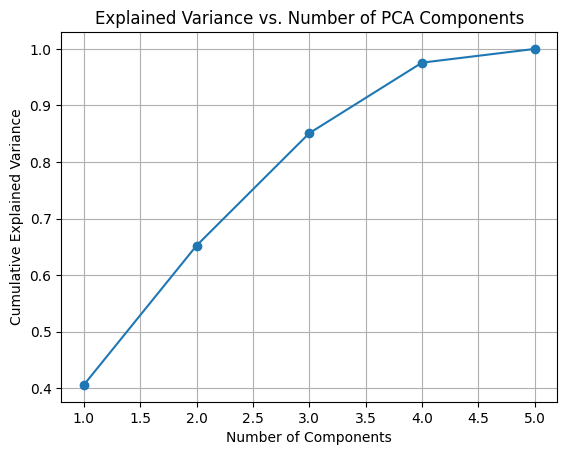

In [116]:
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of PCA Components")
plt.grid(True)
plt.show()

In [117]:
pca = PCA(n_components=2) 
pca_features = pca.fit_transform(X_scaled)

Let's Find Best k For k-means

In [118]:
# find best k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(2,11):
    print(f"Training KMeans for k={i}...")
    km = KMeans(n_clusters=i , random_state=42)
    c = km.fit_predict(pca_features)
    wcss.append(km.inertia_)


    print(f"Calculating silhouette score for k={i}...")
    s = silhouette_score(pca_features, c, sample_size=20000, random_state=42)
    silhouette_scores.append(s)



Training KMeans for k=2...
Calculating silhouette score for k=2...
Training KMeans for k=3...
Calculating silhouette score for k=3...
Training KMeans for k=4...
Calculating silhouette score for k=4...
Training KMeans for k=5...
Calculating silhouette score for k=5...
Training KMeans for k=6...
Calculating silhouette score for k=6...
Training KMeans for k=7...
Calculating silhouette score for k=7...
Training KMeans for k=8...
Calculating silhouette score for k=8...
Training KMeans for k=9...
Calculating silhouette score for k=9...
Training KMeans for k=10...
Calculating silhouette score for k=10...


Text(0.5, 1.0, 'Elbow')

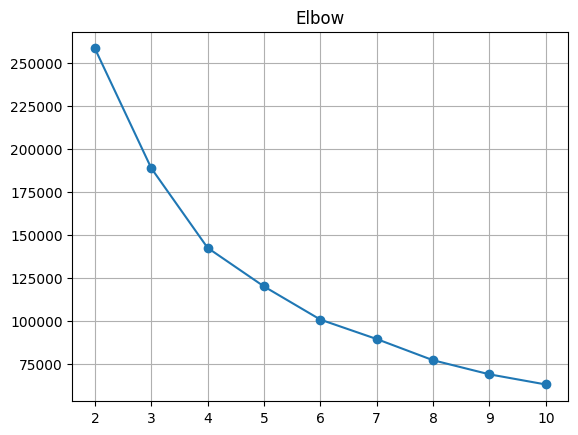

In [119]:
# Elbow method 

plt.plot(range(2,11), wcss , marker='o')
plt.grid(True)
plt.title("Elbow")

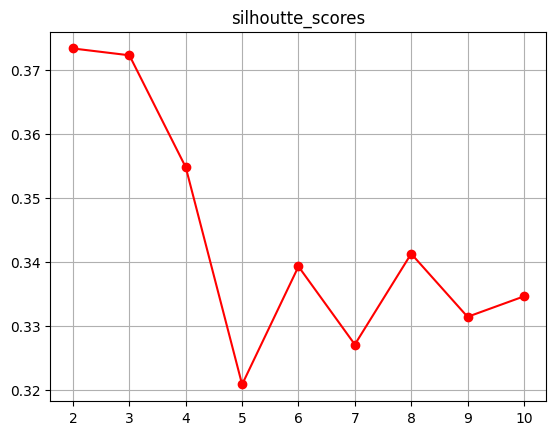

In [120]:
# silhouette_scores

plt.plot(range(2,11), silhouette_scores , marker='o' , color='red')
plt.title("silhoutte_scores")
plt.grid(True)

<!-- Let's Find Best K For K-means -->

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
kmeans_model = KMeans(n_clusters=3, random_state=42)

# البايبلاين
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", pca),
    ("kmeans", kmeans_model)
])

# التدريب والتجميع
clusters = pipeline.fit_predict(X)

print(clusters)


[1 0 1 ... 1 0 1]


In [137]:
c_df['Cluster'] = clusters

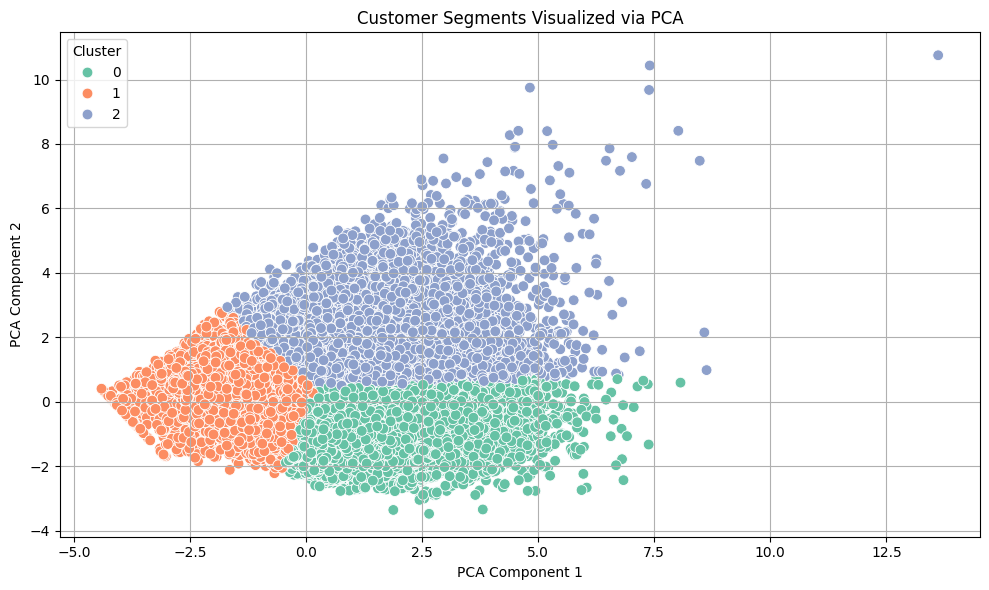

In [138]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0] , y=pca_features[:, 1] , hue=c_df['Cluster'], palette='Set2', s=60)
plt.title("Customer Segments Visualized via PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [139]:
with open('kmeans.pkl' , 'wb') as file :
    pickle.dump(pipeline , file)

# فيه مشكله ال هي السلهوت اسكور قال ان افضل ك هي 2 ولكن الكوع بيقول انها 3


In [125]:
c_df.head(2)

,gender,country,is_loyal,AOV,CLV,Frequency,Monetary,Recency,return_rate,partial_return_rate,Canceled,Delivered,Fully Returned,Partially Returned,Placed,Shipped,cancel_rate,avg_spend,engagement_score,return_class,Cluster
0,Male,USA,0,91,273,2,182,738,0,0,33,0,0,0,33,33,100,100,275,0,1
1,Male,France,1,134,403,3,403,398,0,0,0,33,0,0,67,0,0,0,406,0,0


In [126]:
# ['CLV', 'Frequency', 'Recency', 'AOV', 'return_rate']

cluster_summerized = c_df.groupby('Cluster').agg({
    "CLV" : "mean" , 
    'Frequency' : "mean" , 'Recency' : "mean" , 'AOV' : "mean", 'return_rate' : "mean"
}).reset_index()
print(" k = 6 from Elbow Method")
cluster_summerized

 k = 6 from Elbow Method


,Cluster,CLV,Frequency,Recency,AOV,return_rate
0,0,474,4,266,113,1
1,1,150,2,685,74,2
2,2,581,2,697,231,1


In [127]:
# ['CLV', 'Frequency', 'Recency', 'AOV', 'return_rate']

cluster_summerized = c_df.groupby('Cluster').agg({
    "CLV" : "mean" , 
    'Frequency' : "mean" , 'Recency' : "mean" , 'AOV' : "mean", 'return_rate' : "mean"
}).reset_index()
print(" k = 3 from silhoutte score Method")
cluster_summerized

 k = 3 from silhoutte score Method


,Cluster,CLV,Frequency,Recency,AOV,return_rate
0,0,474,4,266,113,1
1,1,150,2,685,74,2
2,2,581,2,697,231,1


In [128]:
# التفسير
# كلاستر 0 
# عملاء نشطين، بيشتروا بشكل متكرر، وقيمتهم متوسطة. نسبة الرجوع معتدلة. ممكن يكونوا عملاء مستقرين.

# كلاستر1 
#عملاء ضعاف القيمة، نشاط قليل، آخر تفاعل قديم، ونسبة رجوع عالية. غالبًا غير راضين أو غير مهتمين.

# كلاستر 2 
# عملاء بيشتروا حاجات غالية، لكن مش كتير، وقيمتهم عالية. رغم إنهم مش نشطين، لكن كل عملية شراء لها وزن كبير.

# 🧠 توصيات لكل Cluster
# 🔹 Cluster 0 – "العملاء النشطين"
# - نحافظ عليهم ببرامج ولاء أو عروض مخصصة.
# - ممكن نستهدفهم بمنتجات جديدة لأنهم بيشتروا بشكل متكرر.

# 🔹 Cluster 1 – "العملاء المفقودين أو غير الراضين"
# - محتاجين إعادة استهداف أو تحليل سبب الرجوع العالي.
# - جرب ترسل لهم استبيان أو عرض لاسترجاعهم.

# 🔹 Cluster 2 – "العملاء عاليي القيمة"
# - دول VIP رغم إنهم مش نشطين.
# - استهدفهم بعروض فاخرة أو محتوى مخصص.
# - ممكن يكونوا موسميين أو بيشتروا وقت العروض فق




In [129]:
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2],
#                      c=clusters, cmap='viridis', s=50)

# ax.set_title("3D Visualization of K-Means Clusters (PCA 3 Components)")
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")
# plt.legend(*scatter.legend_elements(), title="Cluster")
# plt.show()

# DBScan

In [130]:
سشيسشسيشسشب
سيبسشيسيسيس
سشييشسيسشيسش
from sklearn.cluster import DBSCAN

# to find the best of dbscan  we must choose minpts and eps carfully
# minpts will = to dim + 1 => 4 + 1 = 5
# eps will be calc from elbow method

from sklearn.neighbors import NearestNeighbors

neighbor = NearestNeighbors(n_neighbors=5) # usuaally equals to minpts 
neighbor_fit = neighbor.fit(pca_features)

distances , indexics = neighbor_fit.kneighbors(pca_features)


NameError: name 'سشيسشسيشسشب' is not defined

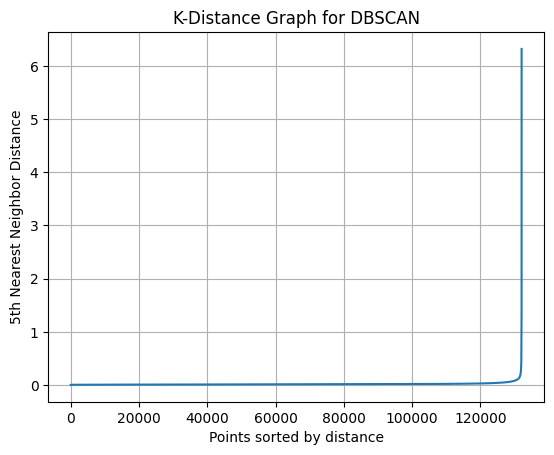

In [ ]:
distances = np.sort(distances[:, 4])  # الصف الخامس = أبعد جار من الـ 5
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.grid(True)
plt.show()

In [ ]:

# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.5, min_samples=5)
# labels = dbscan.fit_predict(pca_features)


MemoryError: bad allocation